In [1]:
#  Loading Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

sns.set_style("whitegrid")

df = pd.read_csv("Pakistan_Poverty_Dataset_2000_2023.csv")

df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

df.head()


,Population (millions),GDP Growth Rate (%),Inflation Rate (%),Unemployment Rate (%),Poverty Headcount Ratio (%),Agriculture Growth Rate (%),Government Social Spending (% of GDP),External Debt (USD billions),Climate Disasters (count)
Year,,,,,,,,,
2000-01-01,138.0,4.2,3.6,6.0,34.7,2.5,3.0,55.0,2
2001-01-01,140.5,3.1,4.4,6.2,33.5,2.0,3.1,57.0,1
2002-01-01,143.0,3.7,3.5,6.1,32.1,4.1,3.2,58.5,1
2003-01-01,145.5,5.0,3.1,5.8,30.2,4.5,3.3,59.0,0
2004-01-01,148.0,6.4,7.4,5.5,28.6,6.0,3.5,60.0,1


In [2]:
# Dataset Overview & Summary

print(f"🔎 Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")

print("\n📋 Dataset Info & Missing Values:")
df.info()

print("\n📈 Descriptive Statistics:")
display(df.describe().T)

 
if df.isnull().sum().sum() == 0:
    print("\n✅ No missing values found. Dataset is clean.")
else:
    print("\n⚠️ Missing values detected. Consider handling them before analysis.")


🔎 Dataset Shape: 24 rows × 9 columns

📋 Dataset Info & Missing Values:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2000-01-01 to 2023-01-01
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Population (millions)                  24 non-null     float64
 1   GDP Growth Rate (%)                    24 non-null     float64
 2   Inflation Rate (%)                     24 non-null     float64
 3   Unemployment Rate (%)                  24 non-null     float64
 4   Poverty Headcount Ratio (%)            24 non-null     float64
 5   Agriculture Growth Rate (%)            24 non-null     float64
 6   Government Social Spending (% of GDP)  24 non-null     float64
 7   External Debt (USD billions)           24 non-null     float64
 8   Climate Disasters (count)              24 non-null     int64  
dtypes: float64(8), int64(1)
memory usage: 1.9 KB

📈 Descri

,count,mean,std,min,25%,50%,75%,max
Population (millions),24.0,166.750000,17.677670,138.0,152.375,166.75,181.125,195.50
GDP Growth Rate (%),24.0,3.729167,1.919121,-0.5,2.650,3.95,5.050,7.20
Inflation Rate (%),24.0,9.050000,6.056617,3.1,4.475,8.20,10.250,30.80
Unemployment Rate (%),24.0,5.800000,0.368310,5.2,5.500,5.80,6.025,6.50
Poverty Headcount Ratio (%),24.0,25.958333,6.193399,18.5,21.800,23.70,29.000,40.50
Agriculture Growth Rate (%),24.0,2.864583,1.830329,-2.0,2.225,2.80,3.625,6.25
Government Social Spending (% of GDP),24.0,4.412500,0.899909,3.0,3.675,4.40,5.225,5.80
External Debt (USD billions),24.0,73.937500,12.891953,55.0,62.625,73.00,84.500,96.00
Climate Disasters (count),24.0,1.833333,1.129319,0.0,1.000,2.00,2.000,5.00



✅ No missing values found. Dataset is clean.


In [ ]:
#  Calculation Unemployment & Poverty

 
avg_unemp = df['Unemployment Rate (%)'].mean()
max_unemp_year = df['Unemployment Rate (%)'].idxmax().year
min_unemp_year = df['Unemployment Rate (%)'].idxmin().year

 
avg_poverty = df['Poverty Headcount Ratio (%)'].mean()
max_poverty_year = df['Poverty Headcount Ratio (%)'].idxmax().year
min_poverty_year = df['Poverty Headcount Ratio (%)'].idxmin().year

#  results 
print("📊 Key Metrics (2000–2023)\n")
print(f"🟢 Average Unemployment: {avg_unemp:.2f}%")
print(f"🔺 Highest Unemployment Year: {max_unemp_year}")
print(f"🔻 Lowest Unemployment Year: {min_unemp_year}\n")

print(f"🟢 Average Poverty: {avg_poverty:.2f}%")
print(f"🔺 Highest Poverty Year: {max_poverty_year}")
print(f"🔻 Lowest Poverty Year: {min_poverty_year}")


📊 Key Metrics (2000–2023)

🟢 Average Unemployment: 5.80%
🔺 Highest Unemployment Year: 2020
🔻 Lowest Unemployment Year: 2006

🟢 Average Poverty: 25.96%
🔺 Highest Poverty Year: 2023
🔻 Lowest Poverty Year: 2018


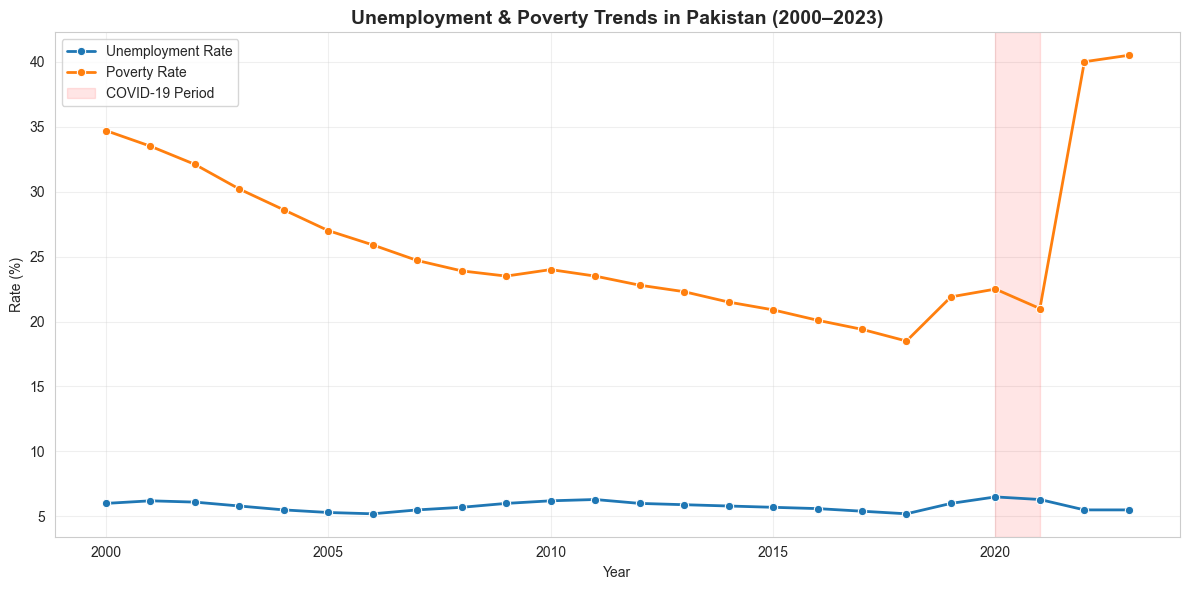

In [4]:
#  Unemployment & Poverty with COVID Highlight

plt.figure(figsize=(12, 6))

 
sns.lineplot(x=df.index.year, y=df['Unemployment Rate (%)'], marker='o', label='Unemployment Rate', linewidth=2)
sns.lineplot(x=df.index.year, y=df['Poverty Headcount Ratio (%)'], marker='o', label='Poverty Rate', linewidth=2)

 
plt.axvspan(2020, 2021, color='red', alpha=0.1, label='COVID-19 Period')

plt.title("Unemployment & Poverty Trends in Pakistan (2000–2023)", fontsize=14, weight='bold')
plt.xlabel("Year")
plt.ylabel("Rate (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


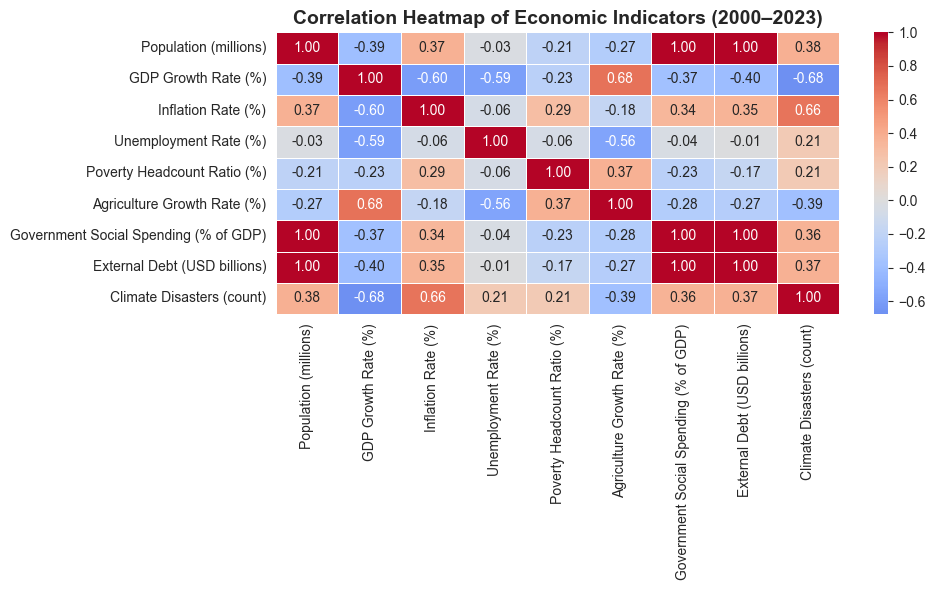

🔍 Top Correlations with Unemployment Rate:
 - Climate Disasters (count): 0.209
 - External Debt (USD billions): -0.011
 - Population (millions): -0.028
 - Government Social Spending (% of GDP): -0.037
 - Poverty Headcount Ratio (%): -0.059
 - Inflation Rate (%): -0.064
 - Agriculture Growth Rate (%): -0.561
 - GDP Growth Rate (%): -0.594


In [5]:
# Correlation Analysis & Heatmap
 
corr_matrix = df.corr()

 
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Heatmap of Economic Indicators (2000–2023)", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

 
print("🔍 Top Correlations with Unemployment Rate:")
unemp_corr = corr_matrix['Unemployment Rate (%)'].sort_values(ascending=False)
for factor, corr in unemp_corr.items():
    if factor != 'Unemployment Rate (%)':
        print(f" - {factor}: {corr:.3f}")


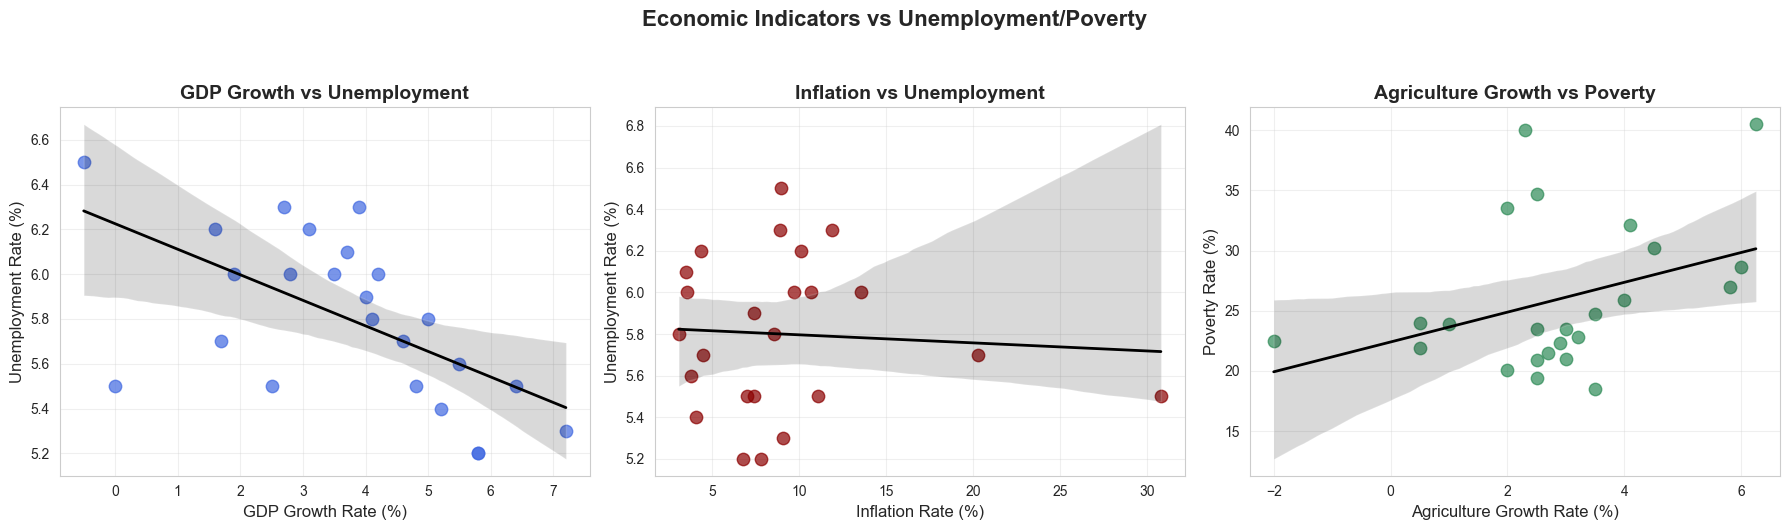

In [6]:
#  Relationship Visualization 

plt.figure(figsize=(18, 5))
 
plt.subplot(1, 3, 1)
sns.regplot(
    x='GDP Growth Rate (%)', y='Unemployment Rate (%)', data=df,
    scatter_kws={'s': 80, 'alpha': 0.7, 'color': 'royalblue'},
    line_kws={'color': 'black', 'lw': 2}
)
plt.title("GDP Growth vs Unemployment", fontsize=14, weight='bold')
plt.xlabel("GDP Growth Rate (%)", fontsize=12)
plt.ylabel("Unemployment Rate (%)", fontsize=12)
plt.grid(alpha=0.3)

# Inflation vs Unemployment 
plt.subplot(1, 3, 2)
sns.regplot(
    x='Inflation Rate (%)', y='Unemployment Rate (%)', data=df,
    scatter_kws={'s': 80, 'alpha': 0.7, 'color': 'darkred'},
    line_kws={'color': 'black', 'lw': 2}
)
plt.title("Inflation vs Unemployment", fontsize=14, weight='bold')
plt.xlabel("Inflation Rate (%)", fontsize=12)
plt.ylabel("Unemployment Rate (%)", fontsize=12)
plt.grid(alpha=0.3)

# Agriculture Growth vs Poverty  
plt.subplot(1, 3, 3)
sns.regplot(
    x='Agriculture Growth Rate (%)', y='Poverty Headcount Ratio (%)', data=df,
    scatter_kws={'s': 80, 'alpha': 0.7, 'color': 'seagreen'},
    line_kws={'color': 'black', 'lw': 2}
)
plt.title("Agriculture Growth vs Poverty", fontsize=14, weight='bold')
plt.xlabel("Agriculture Growth Rate (%)", fontsize=12)
plt.ylabel("Poverty Rate (%)", fontsize=12)
plt.grid(alpha=0.3)

 
plt.suptitle("Economic Indicators vs Unemployment/Poverty", fontsize=16, weight='bold', y=1.05)
plt.tight_layout()
plt.show()


In [7]:
#  Model Training, Evaluation Metrics & Cross-Validation

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib

 
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

 
X = df[['GDP Growth Rate (%)', 'Inflation Rate (%)', 'Agriculture Growth Rate (%)']]
y = df['Unemployment Rate (%)']

 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
 
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Model Performance (Train/Test Split 30%)\n")
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}\n")

#  K-Fold Cross-Validation  
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

print("Cross-Validation Results (5-Fold):")
print(f"Mean R²: {cv_scores.mean():.3f}")
print(f"R² Scores per Fold: {np.round(cv_scores, 3)}\n")

# Residual Analysis 
residuals = y_test - y_pred
print("Residual Analysis:")
print(f"Mean Residual: {residuals.mean():.3f}")
print(f"Std of Residuals: {residuals.std():.3f}\n")


Model Performance (Train/Test Split 30%)

R² Score: 0.473
MAE: 0.194
RMSE: 0.241

Cross-Validation Results (5-Fold):
Mean R²: 0.171
R² Scores per Fold: [ 0.467  0.143  0.479 -1.065  0.832]

Residual Analysis:
Mean Residual: 0.070
Std of Residuals: 0.246



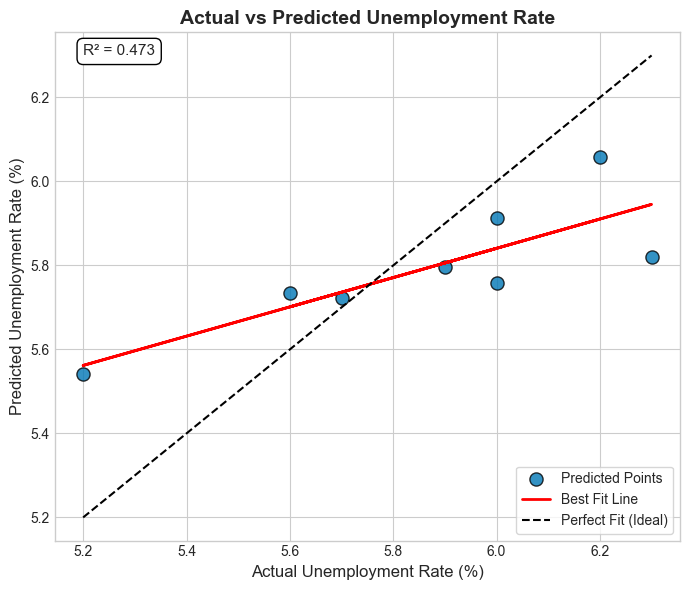

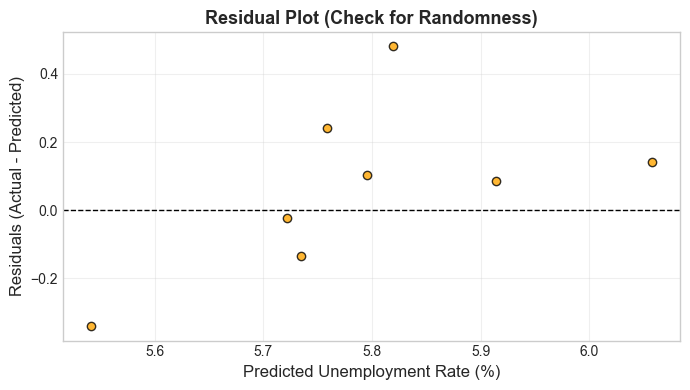

In [8]:
#   Visualization of Model Results

import matplotlib.pyplot as plt
import numpy as np

# Actual vs Predicted 
plt.figure(figsize=(7, 6))
plt.style.use("seaborn-v0_8-whitegrid")
plt.scatter(
    y_test, y_pred,
    alpha=0.8,
    color='#0077b6',
    edgecolors='black',
    s=90,
    label="Predicted Points"
)


z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red', linewidth=2, label="Best Fit Line")

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'k--', lw=1.5, label="Perfect Fit (Ideal)")

plt.title("Actual vs Predicted Unemployment Rate", fontsize=14, weight='bold')
plt.xlabel("Actual Unemployment Rate (%)", fontsize=12)
plt.ylabel("Predicted Unemployment Rate (%)", fontsize=12)

plt.text(
    x=y_test.min(),
    y=y_test.max(),
    s=f"R² = {r2:.3f}",
    fontsize=11,
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4')
)

plt.legend(frameon=True)
plt.tight_layout()
plt.show()

# Residual Plot
plt.figure(figsize=(7, 4))
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.scatter(y_pred, residuals, alpha=0.8, color='orange', edgecolors='k')
plt.title("Residual Plot (Check for Randomness)", fontsize=13, weight='bold')
plt.xlabel("Predicted Unemployment Rate (%)", fontsize=12)
plt.ylabel("Residuals (Actual - Predicted)", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [9]:
#  Predict Unemployment Rate for 2024 

import pandas as pd
from IPython.display import display

 
future_data = {
    "Year": ["2024"],
    "GDP Growth Rate (%)": [3.0],
    "Inflation Rate (%)": [10.0],
    "Agriculture Growth Rate (%)": [3.0]
}

future_df = pd.DataFrame(future_data)

#  Prediction
future_prediction = model.predict(
    future_df[["GDP Growth Rate (%)", "Inflation Rate (%)", "Agriculture Growth Rate (%)"]]
)
future_df["Predicted Unemployment Rate (%)"] = np.round(future_prediction, 2)

 
styled_table = (future_df.style
                .set_properties(**{'text-align': 'center', 'font-weight': 'bold'})
                .set_table_styles([{'selector': 'th',
                                    'props': [('text-align', 'center'),
                                              ('background-color', "#2b2828")]}]))

display(styled_table)


,Year,GDP Growth Rate (%),Inflation Rate (%),Agriculture Growth Rate (%),Predicted Unemployment Rate (%)
0,2024,3.000000,10.000000,3.000000,5.840000


In [10]:
#   Interactive Prediction Tool for 2024 

import ipywidgets as widgets
from IPython.display import display, clear_output

 
gdp_slider = widgets.FloatSlider(value=3.0, min=-5, max=10, step=0.1, description='GDP Growth (%)', continuous_update=False)
inflation_slider = widgets.FloatSlider(value=10.0, min=0, max=25, step=0.1, description='Inflation (%)', continuous_update=False)
agri_slider = widgets.FloatSlider(value=3.0, min=-5, max=10, step=0.1, description='Agri Growth (%)', continuous_update=False)

output = widgets.Output()

 
def update_prediction(change=None):
    with output:
        clear_output(wait=True)
        
        input_data = pd.DataFrame({
            "GDP Growth Rate (%)": [gdp_slider.value],
            "Inflation Rate (%)": [inflation_slider.value],
            "Agriculture Growth Rate (%)": [agri_slider.value]
        })
        
        predicted_value = model.predict(input_data)[0]
        predicted_value = round(predicted_value, 2)

        styled = (input_data.assign(**{"Predicted Unemployment Rate (%)": predicted_value})
                  .style.set_properties(**{'text-align': 'center', 'font-weight': 'bold'})
                  .set_table_styles([{'selector': 'th',
                                      'props': [('text-align', 'center'),
                                                ('background-color', '#f2f2f2')]}]))
        display(styled)

 
gdp_slider.observe(update_prediction, names='value')
inflation_slider.observe(update_prediction, names='value')
agri_slider.observe(update_prediction, names='value')

 
display(widgets.VBox([gdp_slider, inflation_slider, agri_slider, output]))

 
update_prediction()


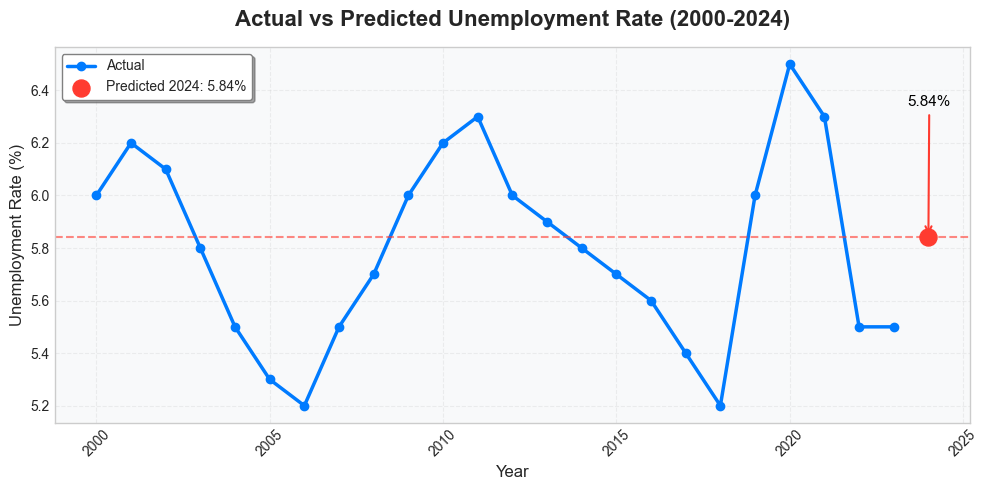

In [13]:
import pandas as pd

 
df = pd.read_csv("Pakistan_Poverty_Dataset_2000_2023.csv")
 
df['Year'] = range(2000, 2000 + len(df))

 
df_clean = df.copy()
df_clean['Year'] = pd.to_datetime(df_clean['Year'], format='%Y')
df_clean.set_index('Year', inplace=True)


#   Prediction Graph  

import matplotlib.pyplot as plt
 
historical_years = df_clean.index.year
historical_values = df_clean['Unemployment Rate (%)']

 
input_data = pd.DataFrame({
    "GDP Growth Rate (%)": [gdp_slider.value],
    "Inflation Rate (%)": [inflation_slider.value],
    "Agriculture Growth Rate (%)": [agri_slider.value]
})
predicted_value = round(model.predict(input_data)[0], 2)
 
plt.figure(figsize=(10, 5))
plt.plot(historical_years, historical_values, marker='o', linewidth=2.5, color='#007BFF', label='Actual')
plt.scatter(2024, predicted_value, color='#FF3B30', s=150, zorder=5, label=f'Predicted 2024: {predicted_value}%')
plt.axhline(y=predicted_value, color='#FF3B30', linestyle='--', alpha=0.6)

 
plt.annotate(f"{predicted_value}%", 
             xy=(2024, predicted_value), 
             xytext=(2023.4, predicted_value + 0.5),
             fontsize=11, color='black',
             arrowprops=dict(arrowstyle="->", color='#FF3B30', lw=1.5))

 
plt.title("Actual vs Predicted Unemployment Rate (2000-2024)", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Unemployment Rate (%)", fontsize=12)
plt.gca().set_facecolor("#f8f9fa")
plt.grid(alpha=0.3, linestyle='--')
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.legend(fontsize=10, loc='best', frameon=True, facecolor='white', shadow=True, edgecolor='gray')

plt.tight_layout()
plt.show()



 

In [12]:
 

import matplotlib.pyplot as plt
import seaborn as sns
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, Table, TableStyle
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib import colors
from reportlab.lib.pagesizes import A4
import pandas as pd

 

#  Unemployment Trend
plt.figure(figsize=(10, 5))
plt.plot(df_clean.index.year, df_clean['Unemployment Rate (%)'], marker='o', color='#007BFF', linewidth=2.5, label="Actual")
plt.scatter(2024, predicted_value, color='red', s=120, zorder=5, label=f"Predicted 2024: {predicted_value}%")
plt.axhline(y=predicted_value, color='red', linestyle='--', alpha=0.6)
plt.title("Unemployment Rate Trend (2000-2024)", fontsize=15, fontweight="bold")
plt.xlabel("Year"); plt.ylabel("Unemployment Rate (%)")
plt.grid(alpha=0.3, linestyle='--')
plt.legend()
plt.tight_layout()
plt.savefig("unemployment_trend.png")
plt.close()

#  Poverty Trend
plt.figure(figsize=(10, 5))
plt.plot(df_clean.index.year, df_clean['Poverty Headcount Ratio (%)'], marker='o', color='#28a745', linewidth=2.5)
plt.title("Poverty Headcount Ratio (2000-2024)", fontsize=15, fontweight="bold")
plt.xlabel("Year"); plt.ylabel("Poverty Headcount (%)")
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig("poverty_trend.png")
plt.close()

#   Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_clean.corr(), annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Socio-Economic Indicators", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.close()

 

stats_table_data = [
    ["Metric", "Value"],
    ["Average Unemployment Rate", f"{df_clean['Unemployment Rate (%)'].mean():.2f}%"],
    ["Max Unemployment Rate", f"{df_clean['Unemployment Rate (%)'].max():.2f}%"],
    ["Min Unemployment Rate", f"{df_clean['Unemployment Rate (%)'].min():.2f}%"],
    ["Predicted 2024 Unemployment", f"{predicted_value:.2f}%"]
]

#   PDF Report 

doc = SimpleDocTemplate("Pakistan_Full_Economic_Analysis_Report.pdf", pagesize=A4)
styles = getSampleStyleSheet()
custom_title = ParagraphStyle('Title', fontSize=20, leading=24, alignment=1, spaceAfter=20)
custom_heading = ParagraphStyle('Heading', fontSize=14, leading=18, spaceAfter=10, textColor=colors.HexColor('#007BFF'))
custom_para = styles['Normal']

elements = []

elements.append(Paragraph("📊 Pakistan Economic & Unemployment Analysis Report (2000-2024)", custom_title))
elements.append(Paragraph("This report presents an in-depth analysis of Pakistan's unemployment trends, "
                          "poverty levels, and their relationship with key economic indicators.", custom_para))
elements.append(Spacer(1, 15))

# Unemployment Trend
elements.append(Paragraph("Unemployment Rate Trend", custom_heading))
elements.append(Image("unemployment_trend.png", width=400, height=200))
elements.append(Spacer(1, 15))

# Poverty Trend
elements.append(Paragraph("Poverty Headcount Trend", custom_heading))
elements.append(Image("poverty_trend.png", width=400, height=200))
elements.append(Spacer(1, 15))

# Correlation Heatmap
elements.append(Paragraph("Correlation Heatmap", custom_heading))
elements.append(Image("correlation_heatmap.png", width=400, height=250))
elements.append(Spacer(1, 15))

# Statistics Table
elements.append(Paragraph("Key Statistics", custom_heading))
table = Table(stats_table_data, hAlign='LEFT')
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), colors.HexColor("#f2f2f2")),
    ('TEXTCOLOR', (0, 0), (-1, 0), colors.black),
    ('GRID', (0, 0), (-1, -1), 0.5, colors.grey),
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
    ('ALIGN', (0, 0), (-1, -1), 'CENTER')
]))
elements.append(table)
elements.append(Spacer(1, 15))

 
elements.append(Paragraph("Recommendations", custom_heading))
elements.append(Paragraph(
    """
    • Increase investment in vocational training programs to boost employment.<br/>
    • Strengthen agricultural productivity to stabilize rural employment.<br/>
    • Monitor inflation and ensure social protection spending is well-targeted.<br/>
    • Reduce reliance on external debt by diversifying exports and boosting local industries.<br/>
    """, custom_para))

doc.build(elements)

print("✅ Full Professional Report Generated: Pakistan_Full_Economic_Analysis_Report.pdf")


✅ Full Professional Report Generated: Pakistan_Full_Economic_Analysis_Report.pdf
